In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# pwd

In [3]:
cd ../RT_Data

C:\Users\antho\OneDrive\Documents\ML_Book\Cryptocurrency\Crypto_Trading_Bot\Kucoin\RT_Data


In [4]:
df = pd.read_csv('22-05-06 cryptodata.csv')

In [5]:
for column in df:
    df.columns = ['Time','pri','Change','vol']
df

,Time,pri,Change,vol
0,22-05-06 16:35:41,"2,698.96",-51.07 (-1.86%),"21,527,990,272"
1,22-05-06 16:35:45,"2,698.91",-50.32 (-1.83%),"21,519,677,440"
2,22-05-06 16:35:51,"2,698.91",-50.32 (-1.83%),"21,519,677,440"
3,22-05-06 16:35:58,"2,698.91",-50.32 (-1.83%),"21,519,677,440"
4,22-05-06 16:36:09,"2,698.91",-50.32 (-1.83%),"21,519,677,440"
...,...,...,...,...
492,22-05-06 23:55:44,"2,663.17",-79.15 (-2.89%),"20,182,476,800"
493,22-05-06 23:56:39,"2,663.17",-79.15 (-2.89%),"20,182,476,800"
494,22-05-06 23:57:34,"2,663.71",-77.39 (-2.82%),"20,189,671,424"
495,22-05-06 23:58:29,"2,664.25",-76.41 (-2.79%),"20,193,060,864"


In [6]:
# list(df)

In [7]:
Volume = []
Price = []
for price in df['pri']:
    Price.append(float(price.replace(',','')))
df['Price'] = Price
for volume in df['vol']:
    Volume.append(int(float(volume.replace(',',''))))
df['Volume'] = Volume
df = df.drop(['pri','vol'],axis=1)

In [8]:
# df['Volume']-df['Volume'].shift(1)
# df = df.set_index('Time')

In [9]:
df

,Time,Change,Price,Volume
0,22-05-06 16:35:41,-51.07 (-1.86%),2698.96,21527990272
1,22-05-06 16:35:45,-50.32 (-1.83%),2698.91,21519677440
2,22-05-06 16:35:51,-50.32 (-1.83%),2698.91,21519677440
3,22-05-06 16:35:58,-50.32 (-1.83%),2698.91,21519677440
4,22-05-06 16:36:09,-50.32 (-1.83%),2698.91,21519677440
...,...,...,...,...
492,22-05-06 23:55:44,-79.15 (-2.89%),2663.17,20182476800
493,22-05-06 23:56:39,-79.15 (-2.89%),2663.17,20182476800
494,22-05-06 23:57:34,-77.39 (-2.82%),2663.71,20189671424
495,22-05-06 23:58:29,-76.41 (-2.79%),2664.25,20193060864


In [10]:
df.iloc[:,2].rolling(window=21).mean()

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
492    2664.306667
493    2664.061429
494    2663.871429
495    2663.821905
496    2663.735714
Name: Price, Length: 497, dtype: float64

In [11]:
df['SMA_21days'] = df.iloc[:,2].rolling(window=21).mean()
df['SMA_50days'] = df.iloc[:,2].rolling(window=50).mean()
df['SMA_100days'] = df.iloc[:,2].rolling(window=100).mean()
df['SMA_150days'] = df.iloc[:,2].rolling(window=150).mean()
df['SMA_200days'] = df.iloc[:,2].rolling(window=200).mean()

In [12]:
df.dropna()

,Time,Change,Price,Volume,SMA_21days,SMA_50days,SMA_100days,SMA_150days,SMA_200days
199,22-05-06 19:26:54,-50.51 (-1.84%),2691.66,20832014336,2693.295238,2695.6182,2697.9010,2695.950933,2695.35920
200,22-05-06 19:27:49,-50.66 (-1.85%),2691.44,20829548544,2693.196667,2695.4668,2697.8286,2695.929267,2695.32160
201,22-05-06 19:28:44,-51.49 (-1.88%),2689.89,20825921536,2693.074762,2695.2786,2697.7421,2695.898133,2695.27650
202,22-05-06 19:29:39,-51.49 (-1.88%),2689.89,20825921536,2692.960952,2695.0926,2697.6552,2695.868467,2695.23140
203,22-05-06 19:30:34,-51.98 (-1.90%),2689.61,20827160576,2692.849524,2694.8984,2697.5661,2695.837067,2695.18490
...,...,...,...,...,...,...,...,...,...
492,22-05-06 23:55:44,-79.15 (-2.89%),2663.17,20182476800,2664.306667,2665.3238,2669.7217,2673.924400,2676.67650
493,22-05-06 23:56:39,-79.15 (-2.89%),2663.17,20182476800,2664.061429,2665.1960,2669.5294,2673.792600,2676.57665
494,22-05-06 23:57:34,-77.39 (-2.82%),2663.71,20189671424,2663.871429,2665.1138,2669.3457,2673.670267,2676.47590
495,22-05-06 23:58:29,-76.41 (-2.79%),2664.25,20193060864,2663.821905,2665.0424,2669.1806,2673.553267,2676.37600


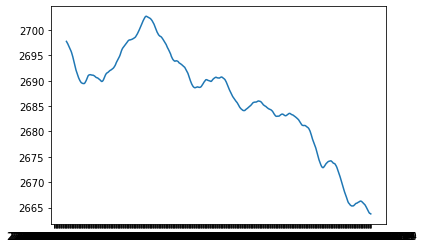

In [13]:
# df1['Price'] = np.log(df1.Price)
# df1['Volume'] = np.log(df.Volume)
x = df.Time
y = df['SMA_21days']
plt.plot(x, y)

In [14]:
np.log(2000)

7.600902459542082